<a href="https://colab.research.google.com/github/Dietrich061991/pre-processamento-black-friday/blob/master/AnalyseBf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive



**Accessando meu google drive**

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Aquivamos acessar a pasta black para pegar o arquivo black_friday.csv a ser analisado**

In [0]:
!ls "/content/drive/My Drive/black"

black_friday.csv


**Imprimindo o a base de dados no DataFrame**

In [0]:
black_df = pd.read_csv ('/content/drive/My Drive/black/black_friday.csv',delimiter=',')
black_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Verificando a quantidade de linhas e colunas na base de dados**

In [0]:
black_df.shape

(537577, 12)

**imprimindo as variaveis**

In [0]:
black_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

**imprimindo as informaçoes da base de dados como Typo de dados, dados nullos, nao nullos, etc....**

In [0]:
black_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


**contagem numérica, média, std, min 1,0 25% 1,5 50% 2,0 75% 2,5 máx 3,0( resumo estatistico da base de dados)**

In [0]:
black_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


**Importante observar se exixte Missing value (valores faltantes NaN) na base de dados**

In [0]:
miss_value = black_df.isnull().sum()
print(miss_value)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64


**Obs: Após verificaçao, as colunas Product_Category_2 e Product_Category_3 possuem dados vazios/nulos.**

**verificando a porcentagem dos valores nullos**

In [0]:
perc_miss = miss_value/black_df.isnull().count()*100
perc_miss

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
dtype: float64

**importante verificar se exixte valores unicos em cada colunas**

In [0]:
print('Unique Values(categoria ) em cada coluna: \n')
for i in black_df.columns:
    print(i,"==================>" ,black_df[i].unique())

Unique Values(categoria ) em cada coluna: 

User_ID ==================> [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID ==================> ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender ==================> ['F' 'M']
Age ==================> ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation ==================> [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category ==================> ['A' 'C' 'B']
Stay_In_Current_City_Years ==================> ['2' '4+' '3' '1' '0']
Marital_Status ==================> [0 1]
Product_Category_1 ==================> [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Product_Category_2 ==================> [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 ==================> [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase ==================> [ 8370 15200  1422 ... 14539 11120 18426]


**obs** : Fora os  valores nulos, as colunas Product_Category_1 e Product_Category_2 contem valores  flutuantes (ou floats), deveriam conter apenas valores do tipo string com as descrições das categorias dos produtos adquiridos.
esse dataset veio de um desafio do site chamado  Analytics Vidhya e que nesse site a descrição das categorias consta como categoria mascarada.Entao devemos considerar apenas os valores de tipo numericos.

In [0]:
black_df['Product_Category_2'] = black_df['Product_Category_2'].replace(np.nan, 0)
black_df['Product_Category_3'] = black_df['Product_Category_3'].replace(np.nan, 0)


**Agora vamos definir as variaveis importante para a nossa pesquisa**
    

1.   Quais sao as pessoas que mais compraram na loja durante a Black Friday (Homem ou mulher?
2. idade das pessoas que mais compraram
3.   Homens ou Mulheres Casados ou Não Casados?
4. idade das pessoas que mais compraram
5.  Tipo de Residentes  ?
6.  Quais produtos foram mais vendidos na Black Friday?
7.  Quem comprou mais produtos de uma certa categoria?



**verificando se foram homens ou mulheres que compraram mais nessa loja, foi realizada a contagem dos valores de compras por gênero M e F**

In [0]:
print("numero_cliente Masculino   e numero_cliente Feminino")
pd.value_counts(black_df['Gender'])

numero_cliente Masculino   e numero_cliente Feminino


M    405380
F    132197
Name: Gender, dtype: int64

**visualizaçao grafica dos Generos**

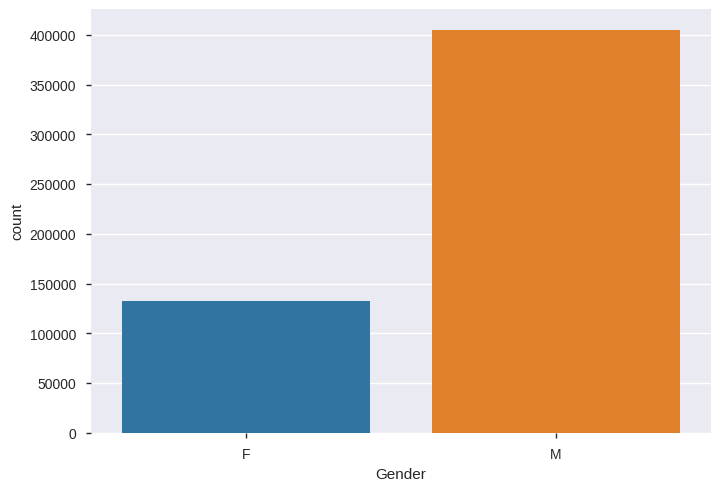

In [0]:
sns.countplot(black_df['Gender'])
                                                                                                         

 Apos a contagem e a visualizaçao, podemos deduzir que os  homens realizaram mais compras nessa loja em relação as mulheres.

**compra por faixa de idade**

In [0]:
print("Compras por faixa de idade")
pd.value_counts(black_df['Age'])

Compras por faixa de idade


26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

**visualizaçao grafica por faixa de idade**

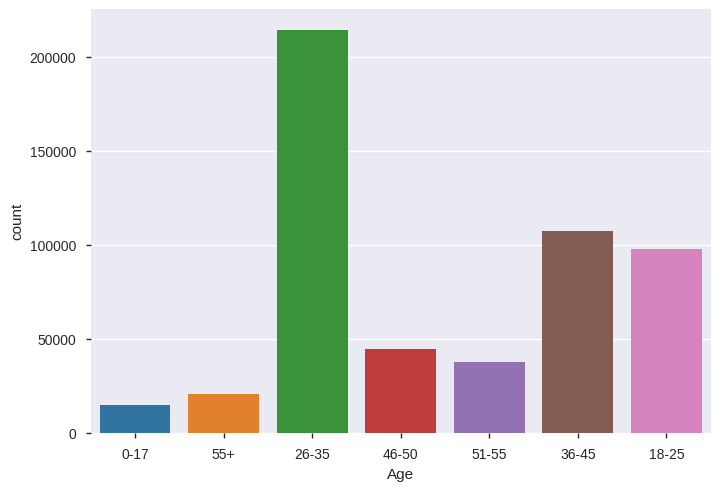

In [0]:
sns.countplot(black_df['Age'])

Estamos observando que a maioria dos compradores dessa loja encontra-se na faixa de idade de 26–35 anos.

**seria bom relacionar os dados de gênero e idade, para verificar qual a faixa etária dos homens que mais compraram :**

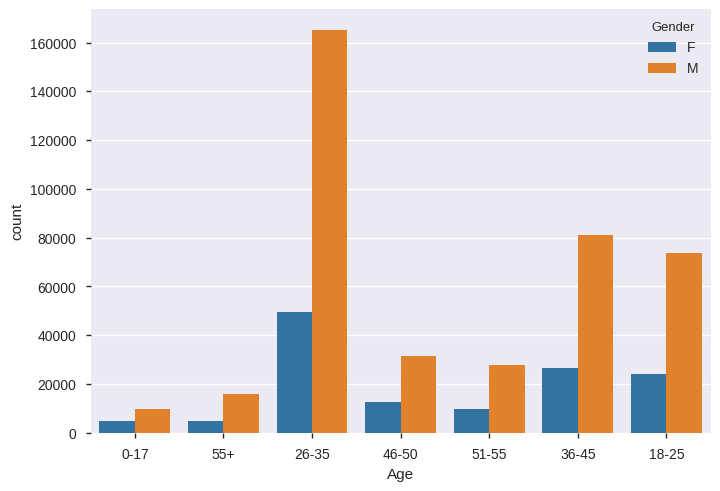

In [0]:
sns.countplot(black_df['Age'],hue=black_df['Gender'])

A maioria dos compradores dessa loja encontra-se na faixa de 26–35 anos de idade  e que a maioria dos compradores é do sexo masculino, tambem  podemos visualizar que as mulheres que mais realizaram compras nessa loja durante a Black Friday  se encontram na faixa de 26–35 anos.

**Compras realizadas por situaçao Matrimonial**

In [0]:
print("Compras realizadas por situaçao Matrimonial")
print(" <<> 0 --> solteiro  e  1 ---->casado >>>    ")

pd.value_counts(black_df['Marital_Status'])

Compras realizadas por situaçao Matrimonial
 <<> 0 --> solteiro  e  1 ---->casado >>>    


0    317817
1    219760
Name: Marital_Status, dtype: int64

**Em seguinte vamos observar as compras realizadas por situaçao matrimonial num grafico**

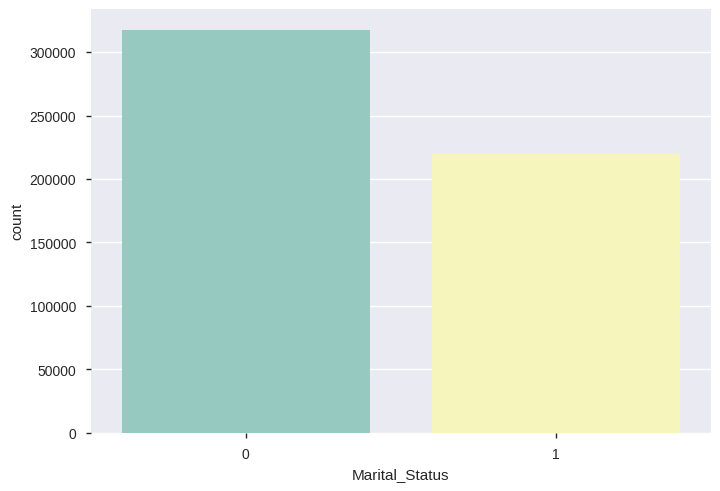

In [0]:
sns.countplot(black_df['Marital_Status'],palette="Set3")

observamos no grafico que a quantidade de comprars realizadas pelos solteiros é superior a quantidade de compras realizadas pelos casados. 

**Aqui vamos relacionar os dados de idade e situçao matrimonial, para verificar qual a faixa etária dos homens que mais compraram :**

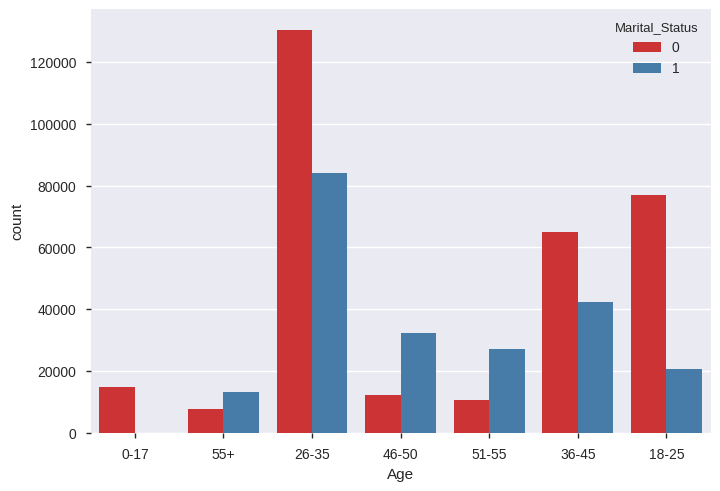

In [0]:
sns.countplot(black_df['Age'],hue=black_df['Marital_Status'],palette="Set1")

identificamos que  a maioria das pessoas que fizeram mais compras teem entre 26–35 anos e sao  solteira**

**Agora vamos fazer uma correlaçao das variaveis  (Gender, Age e Marital_status).Mas antes de continuar devemos criar uma nova coluna chamada Genders_Marital_status que sera uma junçao das colunas Gender e Marital_status**

In [0]:
black_df['Genders_Marital_Status'] = black_df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(black_df['Genders_Marital_Status'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


In [0]:
def categori_Genero(a):
    if a == 'F_0':
        return 'Feminino__Solteira'
    elif a == 'M_0':
        return 'Masculino__Solteiro'
    elif a == 'F_1':
        return 'Feminino__Casada'
    elif a == 'M_1':
        return 'Masculino__Casado'

black_df['Genders_Marital_Status'] = black_df['Genders_Marital_Status'].apply(categori_Genero)
print(black_df['Genders_Marital_Status'].unique())

['Feminino__Solteira' 'Masculino__Solteiro' 'Masculino__Casado'
 'Feminino__Casada']


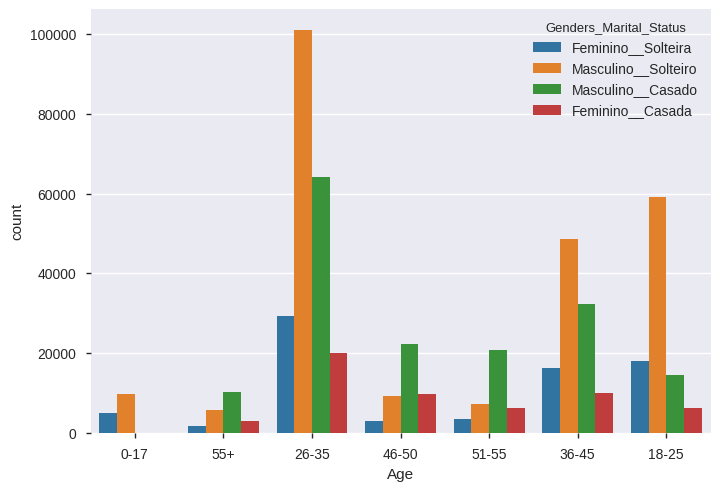

In [0]:
sns.countplot(black_df['Age'],hue=black_df['Genders_Marital_Status'])


- A maioria dos compradores tem de 26–35 anos
- O homem solteiro se torna o maior comprador e tem entre 26-35
- As mulheres solteiras realizaram mais compras na faixa de 26–35 anos
- entre 36-45 podemos observar que mais homens casados compraram; pode ser que realizaram compras para sua cônjuge oufilhos.





**O proximo passo a seguir sera a analise dos produtos vendidoas**

In [0]:
print("Quantidade de produtos vendidos")
pd.value_counts(black_df['Product_ID'])

Quantidade de produtos vendidos


P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
             ... 
P00299342       1
P00169842       1
P00299742       1
P00341542       1
P00204042       1
Name: Product_ID, Length: 3623, dtype: int64

**Temos 3623 produtos cadastrados na loja mas vamos visualisar apenas os 5 produtos mais vendidos **

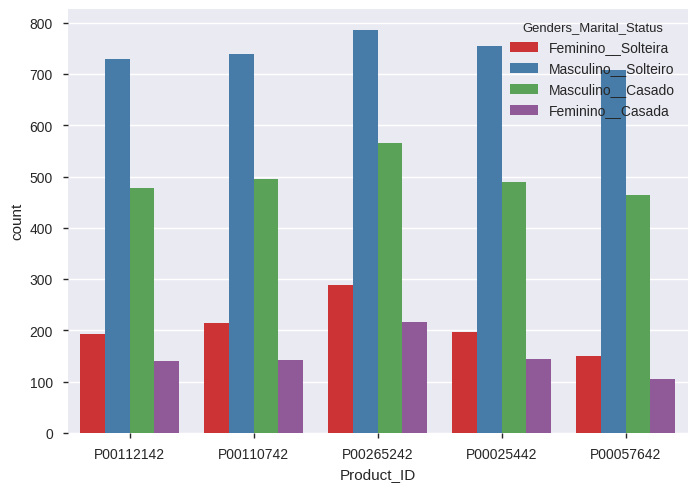

In [0]:
black_df_new = black_df.query("Product_ID in ['P00265242','P00110742','P00025442','P00112142','P00057642']")

sns.countplot(black_df_new['Product_ID'], hue=black_df['Genders_Marital_Status'],palette="Set1")


quando observamos o grafico, podemos deduzir que os cinco produtos mais vendidos são mais adquiridos por homens solteiros, seguido pelos homens casados.

**comparativo de compras realizadas por residentes**

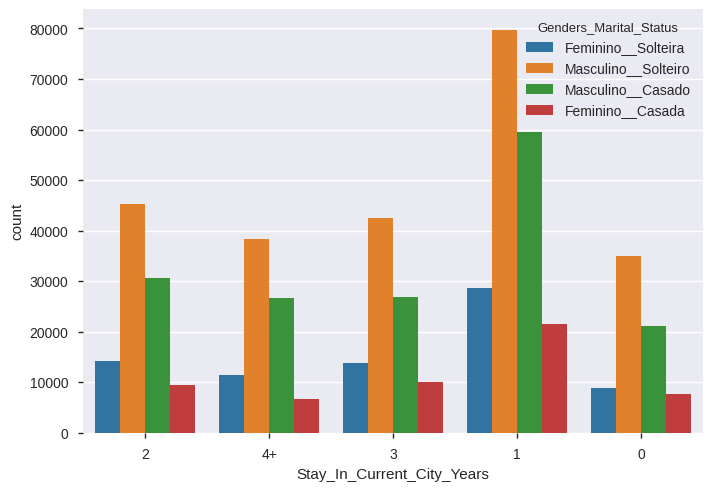

In [0]:
 sns.countplot(black_df['Stay_In_Current_City_Years'],hue=black_df['Genders_Marital_Status']) 

Estamos observando no grafico que os residentes que moram ha no maximo  2 anos na cidade realizaram mais compras e de 1 à 2 anos de estadia na cidade, os homens solteiros realizaram o maior numero de compra em seguida temos os homens casados 

**As compras por gênero, faixa etária, estado civil e a categoria 1 do produto encontram-se representadas abaixo**

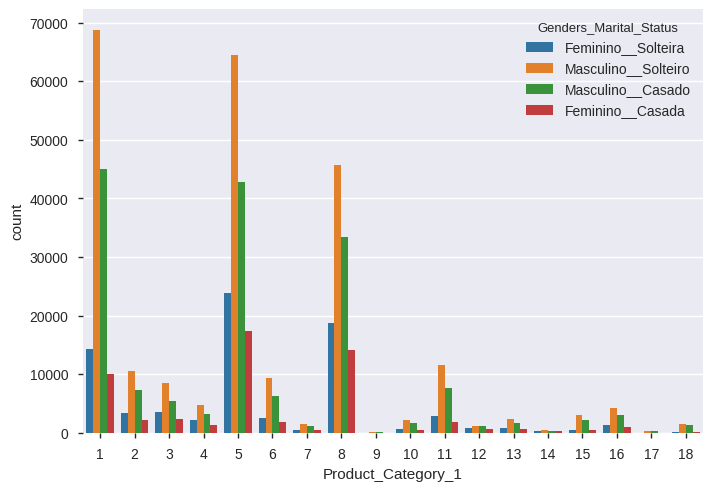

In [0]:
 sns.countplot(black_df['Product_Category_1'],hue=black_df['Genders_Marital_Status']) 

In [0]:
df = black_df[black_df['Product_Category_2'] != 0]


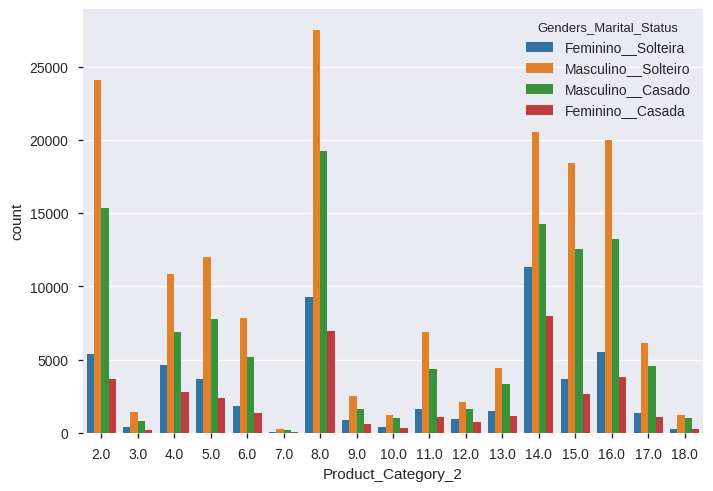

In [0]:
 sns.countplot(df['Product_Category_2'],hue=black_df['Genders_Marital_Status']) 

In [0]:
df = black_df[black_df['Product_Category_3'] != 0]


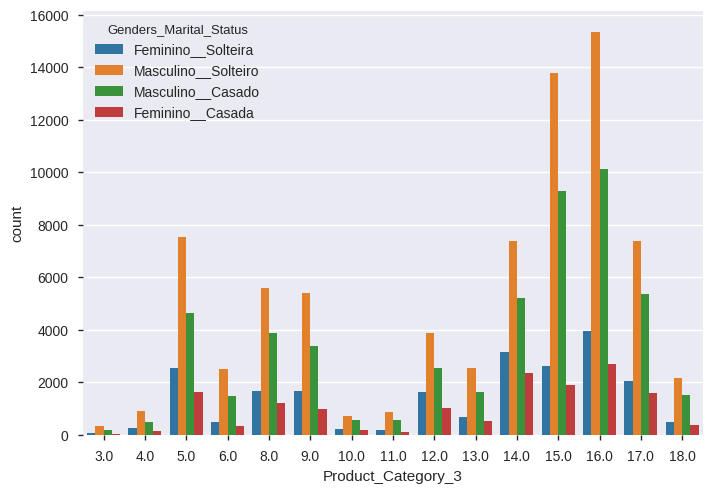

In [0]:
 sns.countplot(df['Product_Category_3'],hue=black_df['Genders_Marital_Status']) 

**Conclusão**
Neste artigo vimos como aplicar funcionalidades interessantes do Pandas em uma base de dados real.

Além disso, vimos como extrair insights interessantes dos dados.

Conhecer bem essa biblioteca e saber aplicar seus recursos pode ser um diferencial em projetos de Data Science.